### Introduction
Credit card fraud occurs when someone illegally uses another person's credit card details to make unauthorized transactions. It often happens through lost or stolen cards, phishing, scams, hacking, or fake websites, and can cause serious financial harm.

### Purpose
To combat credit card fraud, financial institutions need accurate detection systems. This project uses a synthetic dataset to build a classification model that identifies fraudulent transactions. The model is then tested on a real, imbalanced dataset of 284,807 transactions—only 492 of which are fraudulent—from European cardholders in September 2013, aiming for accurate and generalizable fraud detection.

In [229]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score
from sklearn.metrics import average_precision_score, precision_recall_curve, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, KFold, cross_val_score

In [230]:
%matplotlib inline

### Exploratory Data Analysis

In [231]:
syn_df = pd.read_csv("/content/synthetic_credit_card_data.csv")

In [232]:
syn_df.head()

,Time,Amount,Class,V1,V2,V3,V4,V5,V6,V7,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,64720.532537,34.811260,0,-1.487862,-0.616148,0.783682,-1.222743,1.419358,0.882922,-0.212662,...,-0.322383,0.009116,-0.443095,0.073911,-0.261549,1.391710,-0.703118,0.320938,1.237980,1.789313
1,164283.432148,30.640911,0,-1.125186,-0.392675,0.007539,-0.615911,0.700138,1.292878,0.655523,...,1.622637,-0.661787,-0.441343,-2.014612,-1.102806,0.413684,-1.978617,0.764786,-0.124895,1.316175
2,126488.553145,108.220120,0,0.388819,-1.031827,0.654813,-1.868898,-0.498557,-0.820829,-0.280532,...,-0.671855,0.031017,0.293780,1.098200,0.278169,-1.362968,1.306779,0.681244,0.274745,0.327457
3,103448.186069,4.500953,0,-1.173873,-0.889252,-1.014317,-0.073833,1.404494,-0.701832,0.520829,...,-0.340237,-0.735497,-0.147217,-0.486710,2.885524,-0.833183,-0.749549,1.422315,0.086486,-0.528534
4,26960.021068,2.764358,1,1.112634,0.934377,-0.356614,1.087119,0.460055,-0.391276,-0.135285,...,0.359871,-0.540576,-1.742756,0.164173,-0.501108,-0.393556,-1.363295,0.495780,-0.538248,-0.484265


In [233]:
syn_df.info()
# Time is number of seconds elapsed between this transaction and the first transaction
# V1 - V28 are 'masked' variables in order to protect the identity/information of the customers. They have
# undergone PCA and the values are not the original values of the dataset.
# Amount is the amount of money spent in that transaction
# Class 1 = fraudulent transaction, Class 0 = real transaction

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    10000 non-null  float64
 1   Amount  10000 non-null  float64
 2   Class   10000 non-null  int64  
 3   V1      10000 non-null  float64
 4   V2      10000 non-null  float64
 5   V3      10000 non-null  float64
 6   V4      10000 non-null  float64
 7   V5      10000 non-null  float64
 8   V6      10000 non-null  float64
 9   V7      10000 non-null  float64
 10  V8      10000 non-null  float64
 11  V9      10000 non-null  float64
 12  V10     10000 non-null  float64
 13  V11     10000 non-null  float64
 14  V12     10000 non-null  float64
 15  V13     10000 non-null  float64
 16  V14     10000 non-null  float64
 17  V15     10000 non-null  float64
 18  V16     10000 non-null  float64
 19  V17     10000 non-null  float64
 20  V18     10000 non-null  float64
 21  V19     10000 non-null  float64
 22 

In [234]:
syn_df.loc[syn_df.duplicated() == True] #no duplicated values

,Time,Amount,Class,V1,V2,V3,V4,V5,V6,V7,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28


In [235]:
syn_df.isnull().sum()

,0
Time,0
Amount,0
Class,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0


In [236]:
syn_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,10000.0,85390.771568,49702.485864,2.010486,42565.628556,85108.945081,127873.096984,172751.213944
Amount,10000.0,99.092363,98.372437,0.017799,28.502389,68.949530,136.914643,836.456888
Class,10000.0,0.272900,0.445472,0.000000,0.000000,0.000000,1.000000,1.000000
V1,10000.0,0.012355,0.999774,-3.922400,-0.658405,0.016807,0.682376,4.479084
V2,10000.0,0.134660,1.028845,-3.856375,-0.577412,0.132975,0.834805,3.942331
V3,10000.0,-0.156477,1.044839,-4.465604,-0.852307,-0.150801,0.557060,3.727833
V4,10000.0,0.147349,1.041290,-4.295391,-0.554406,0.146439,0.846478,3.795904
V5,10000.0,-0.001009,1.011468,-3.421380,-0.676776,0.009976,0.681551,3.745379
V6,10000.0,0.017098,0.998442,-4.157734,-0.665571,0.023089,0.693935,3.495113
V7,10000.0,-0.006684,1.000750,-4.462969,-0.685419,-0.014565,0.667006,3.760155


<Axes: xlabel='Class'>

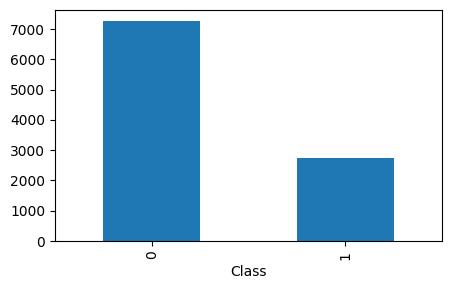

In [237]:
syn_df.Class.value_counts().plot(kind='bar', figsize=(5,3)) #1 is fraud, 0 is real

In [238]:
syn_df.describe() #summary statistics of each variable

,Time,Amount,Class,V1,V2,V3,V4,V5,V6,V7,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,85390.771568,99.092363,0.272900,0.012355,0.134660,-0.156477,0.147349,-0.001009,0.017098,-0.006684,...,-0.007412,-0.009843,-0.001267,0.009106,0.011996,-0.020204,-0.007219,0.002261,-0.000844,0.013401
std,49702.485864,98.372437,0.445472,0.999774,1.028845,1.044839,1.041290,1.011468,0.998442,1.000750,...,1.002028,1.006363,0.993084,0.999221,0.996585,1.003247,1.007222,0.988540,1.005171,0.999814
min,2.010486,0.017799,0.000000,-3.922400,-3.856375,-4.465604,-4.295391,-3.421380,-4.157734,-4.462969,...,-3.484091,-3.869569,-4.003598,-4.413886,-3.729174,-3.342148,-4.404214,-3.884070,-3.814205,-3.718903
25%,42565.628556,28.502389,0.000000,-0.658405,-0.577412,-0.852307,-0.554406,-0.676776,-0.665571,-0.685419,...,-0.685813,-0.689194,-0.661082,-0.673750,-0.665208,-0.692802,-0.683848,-0.663468,-0.675649,-0.664186
50%,85108.945081,68.949530,0.000000,0.016807,0.132975,-0.150801,0.146439,0.009976,0.023089,-0.014565,...,0.002225,-0.003643,0.011658,0.005117,0.004265,-0.017600,-0.012175,-0.000517,-0.011476,0.007598
75%,127873.096984,136.914643,1.000000,0.682376,0.834805,0.557060,0.846478,0.681551,0.693935,0.667006,...,0.676430,0.666929,0.665155,0.679162,0.696200,0.651328,0.670512,0.659414,0.685043,0.681518
max,172751.213944,836.456888,1.000000,4.479084,3.942331,3.727833,3.795904,3.745379,3.495113,3.760155,...,3.782188,3.644306,3.678191,3.467730,3.605568,3.863906,4.219366,3.676923,3.637076,3.424904


At first glance of the data, we derive the following insights:
* There are more fraudulent data points than real transactions. This is synthesised data and not the original, created for the purposes of better training, which may be the reason why there are more fraudulent transactions than real ones.
* There are no duplicated data values, and no null or missing values.
* The distributions of all 30 independent variables are quite large in range, and could potentially have very skewed or non-Gaussian distributions.



In [239]:
syn_df['Class'] = syn_df['Class'].astype('object')
col_names = syn_df.columns.tolist()
col_names.pop()
print(col_names)

['Time', 'Amount', 'Class', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27']


In [240]:
def chunks(lst, n):
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

cols = list(chunks(col_names, 5))
cols #change shape of column list to make plotting easier

[['Time', 'Amount', 'Class', 'V1', 'V2'],
 ['V3', 'V4', 'V5', 'V6', 'V7'],
 ['V8', 'V9', 'V10', 'V11', 'V12'],
 ['V13', 'V14', 'V15', 'V16', 'V17'],
 ['V18', 'V19', 'V20', 'V21', 'V22'],
 ['V23', 'V24', 'V25', 'V26', 'V27']]

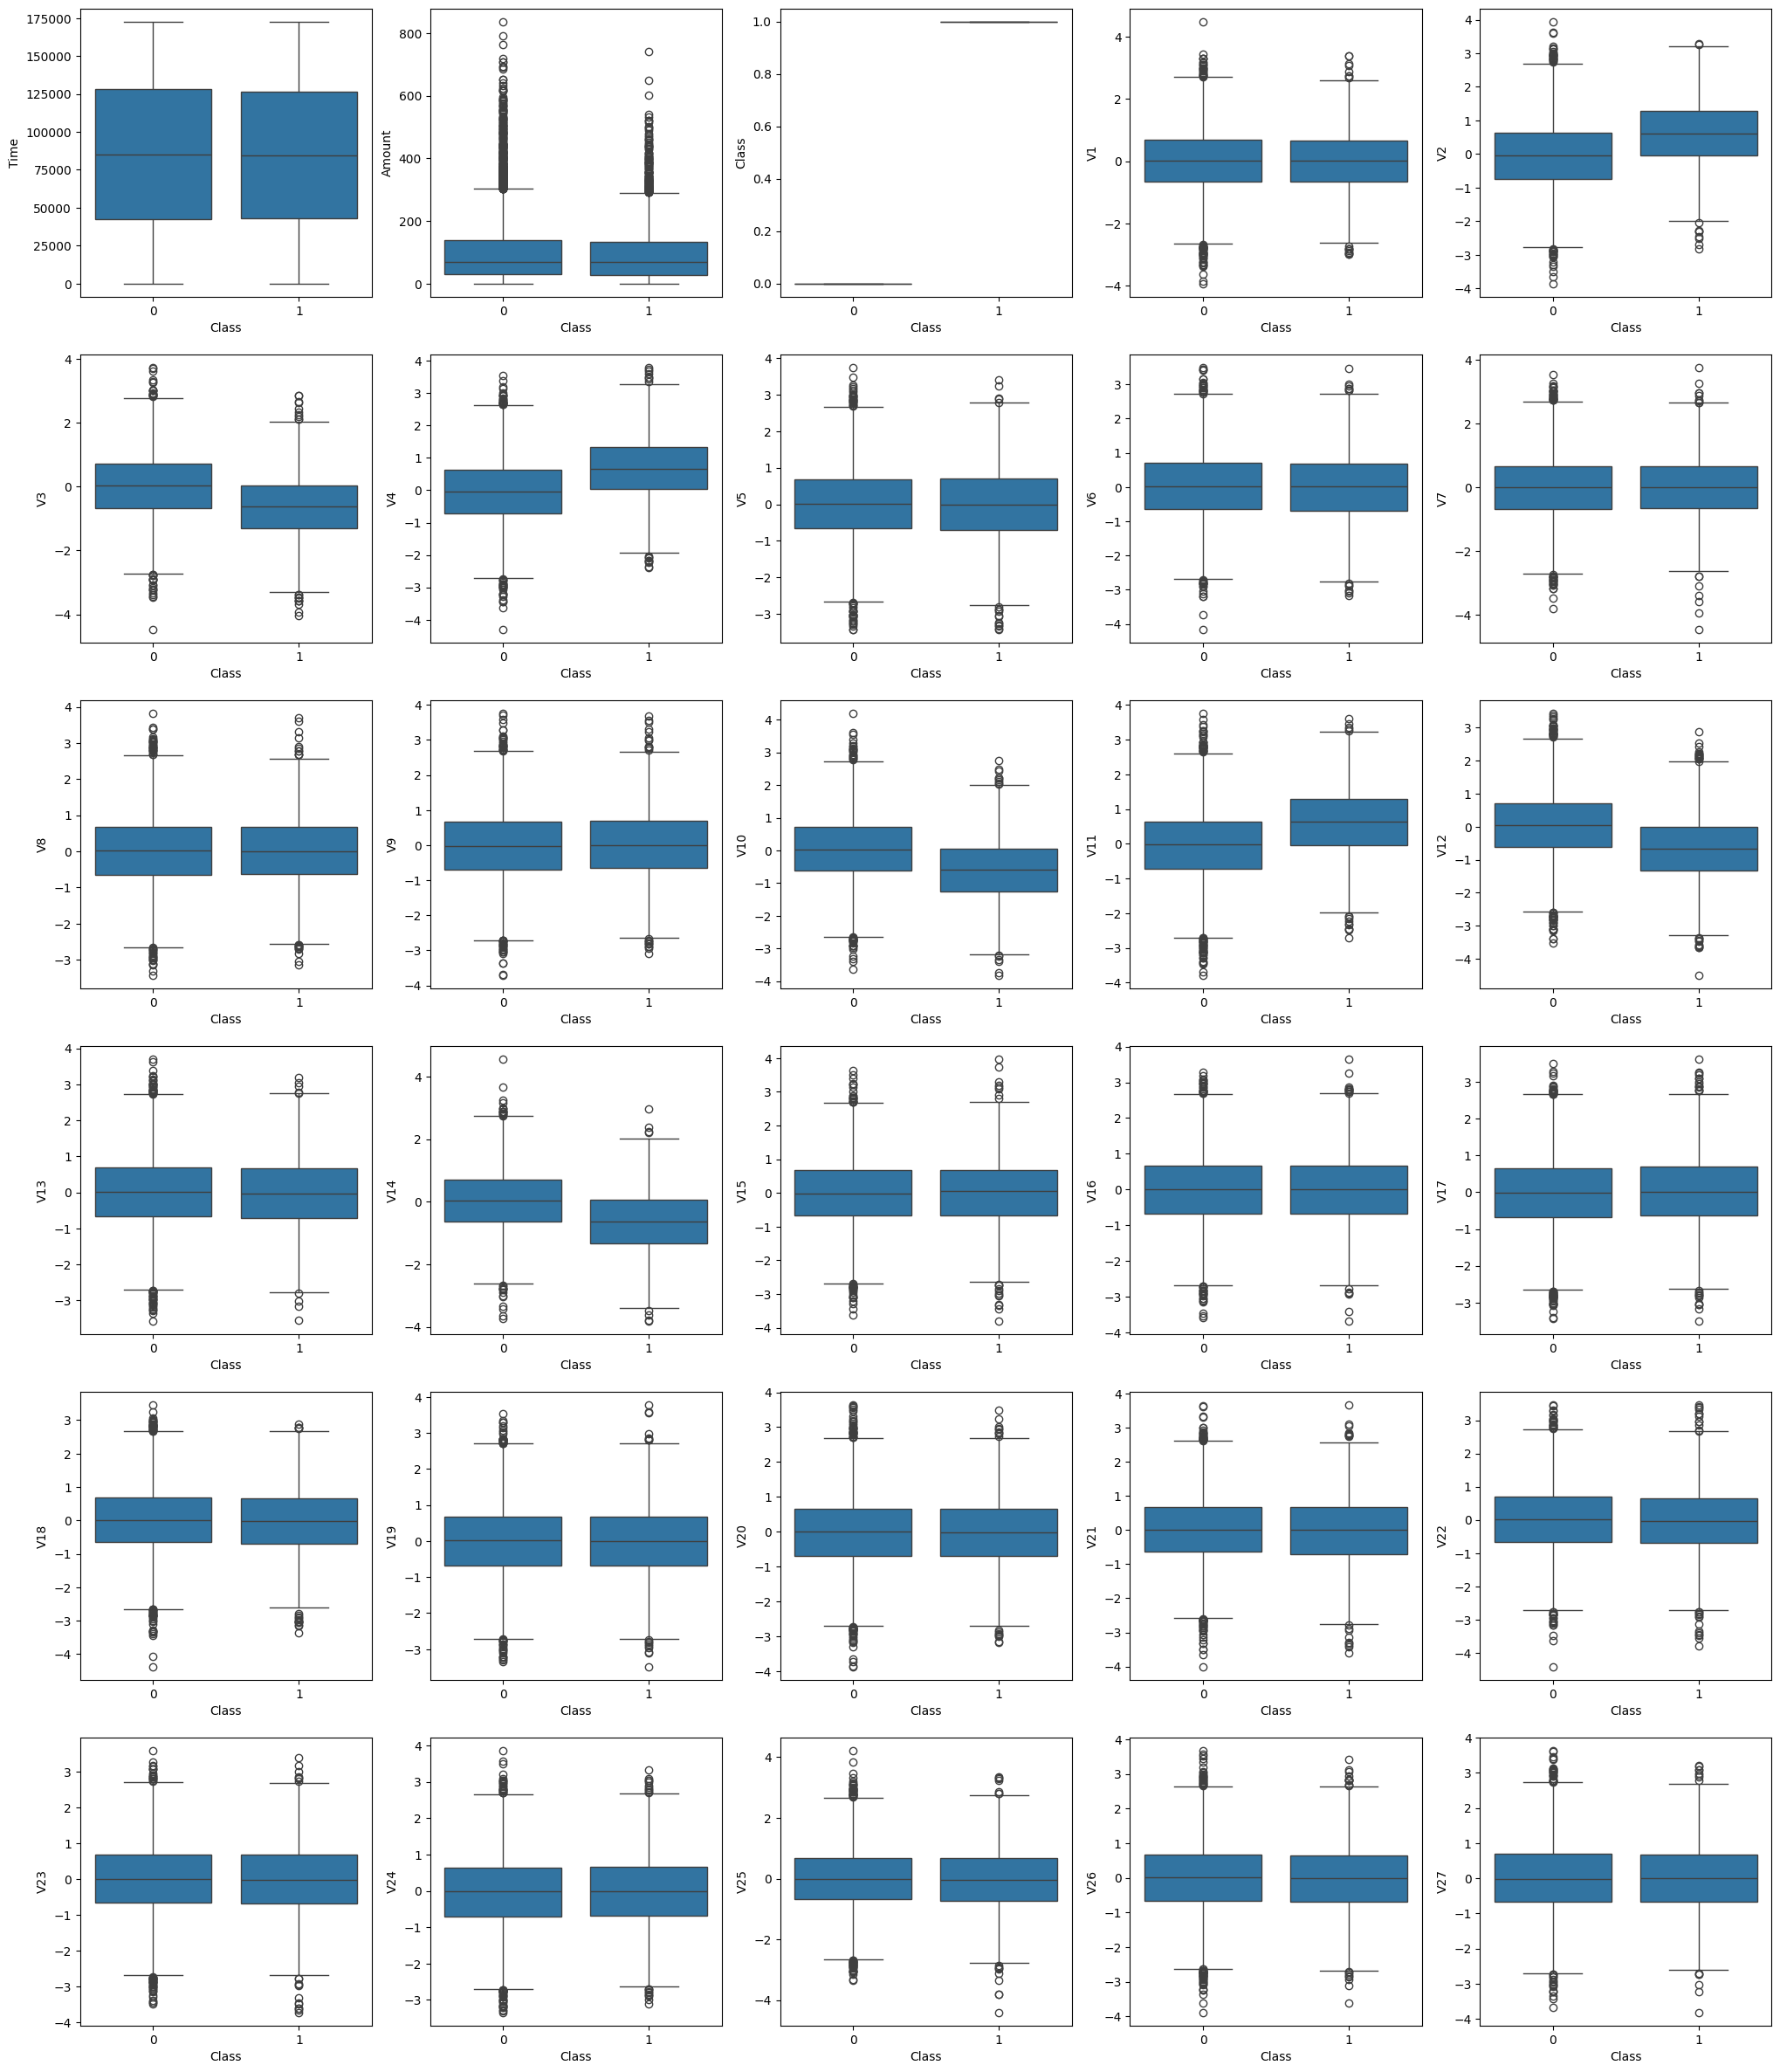

In [241]:
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(25,30))
for r in range(0,6):
    for c in range(0,5):
        sns.boxplot(data=syn_df, x='Class', y=cols[r][c], ax=axes[r][c])

# There are many outliers in the dataset across the many variables. Check the distributions for each of these variables next.

/tmp/ipython-input-3380991954.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=syn_df, x=cols[r][c], hue='Class', ax=axes[r][c])


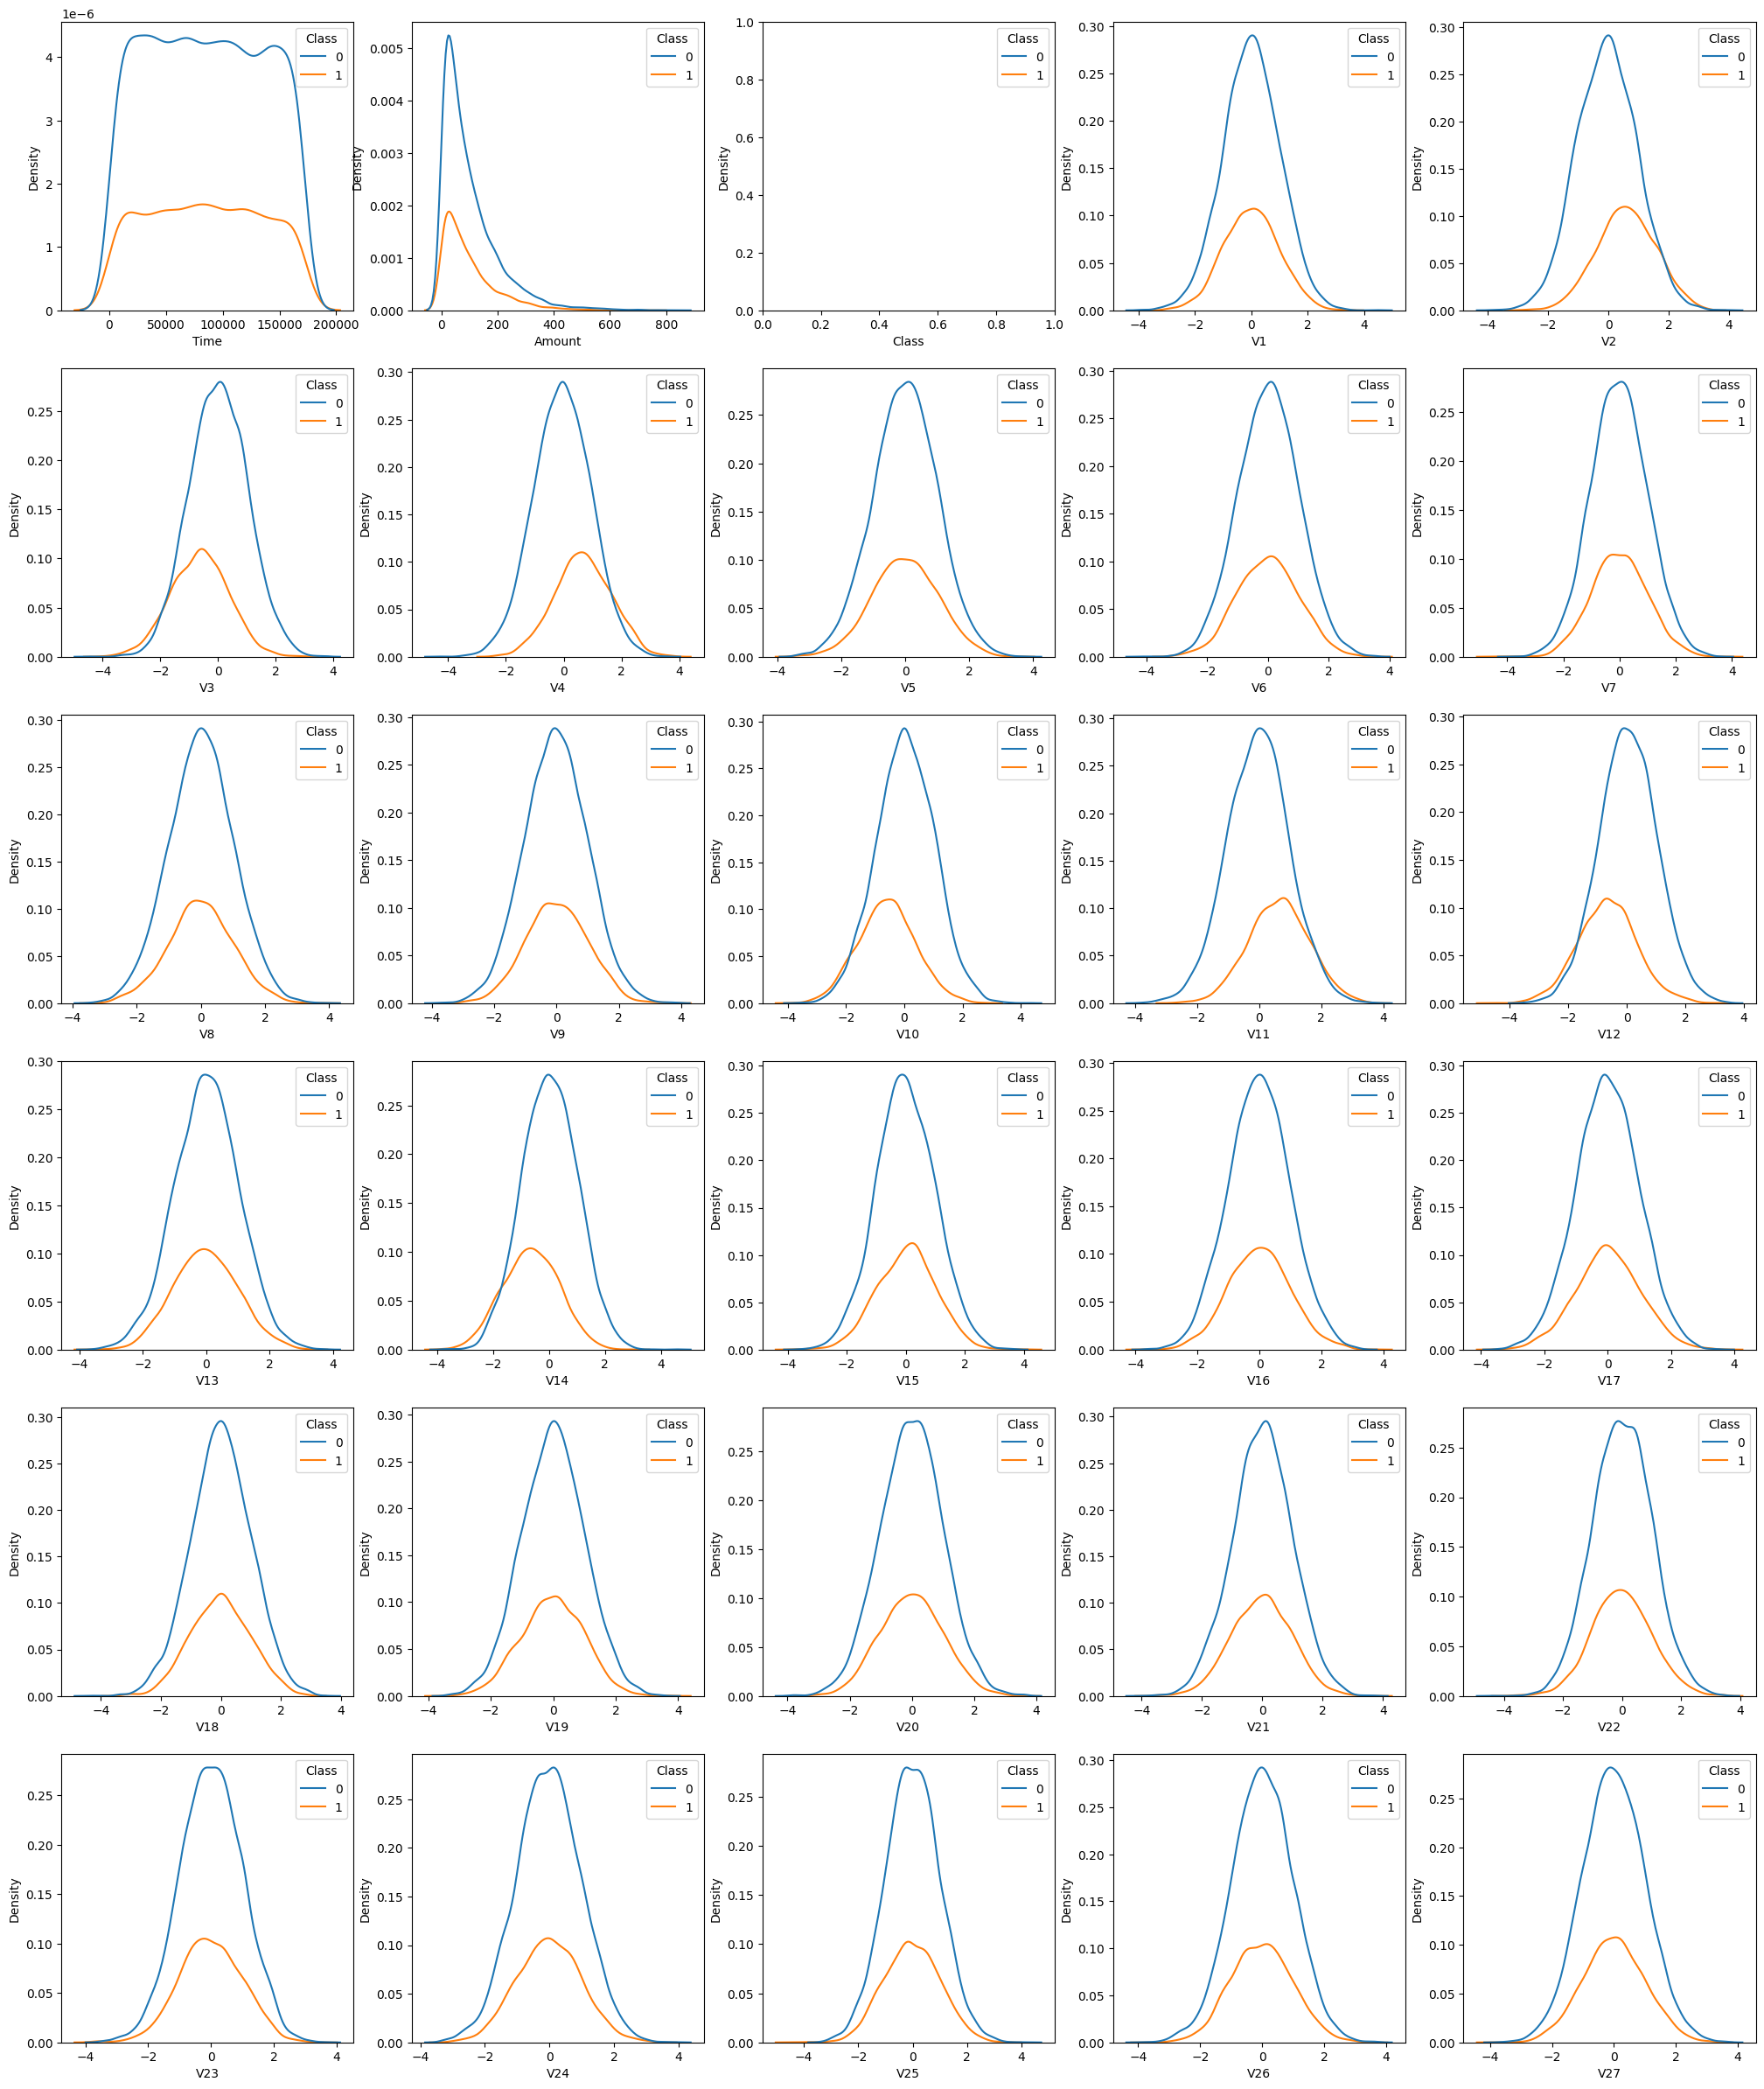

In [242]:
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(25,30))
for r in range(0,6):
    for c in range(0,5):
        sns.kdeplot(data=syn_df, x=cols[r][c], hue='Class', ax=axes[r][c])

# Some of the distributions are not normally distributed - Time in particular seems to separate into different segments.

We can see by checking the distributions of the 30 independent variables that there are significant numbers of outliers in the dataset, as well as varied distributions. Only a few of the variables have a normal/Gaussian distribution. Interestingly, the distributions for both classes seem to have some level of separability for certain variables (for example, in V10, V3, V7, V16, V12, and V14). However, most of the independent variables have both the fraudulent and real transaction classes overalapped.

In [243]:
syn_df['Class'] = syn_df['Class'].astype('int')
#in order to do correlation analysis, data type must be numerical

<Axes: >

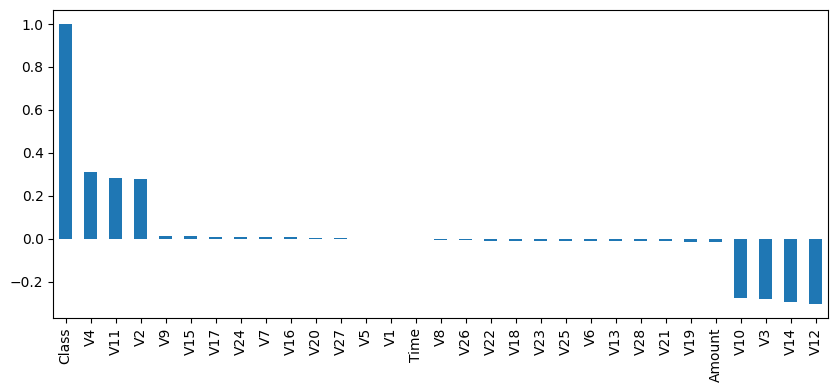

In [244]:
syn_df.corr()['Class'].sort_values(ascending = False).plot(kind='bar', figsize=(10,4))

Insights: the variables V4, V11, and V2 are important variables that are positively correlated with fraudulent credit card transactions.

This means an increase in these variables will lead to a higher likelihood that the transaction was fraudulent On the other hand, V12, V3, V14, and V10 are important variables that are negatively correlated with fradulent credit card transactions. An increase in these variables mean the transaction is less likely to be fraudulent. The distributions that were more separated are also the distributions that correlated least with fraudulent transactions.

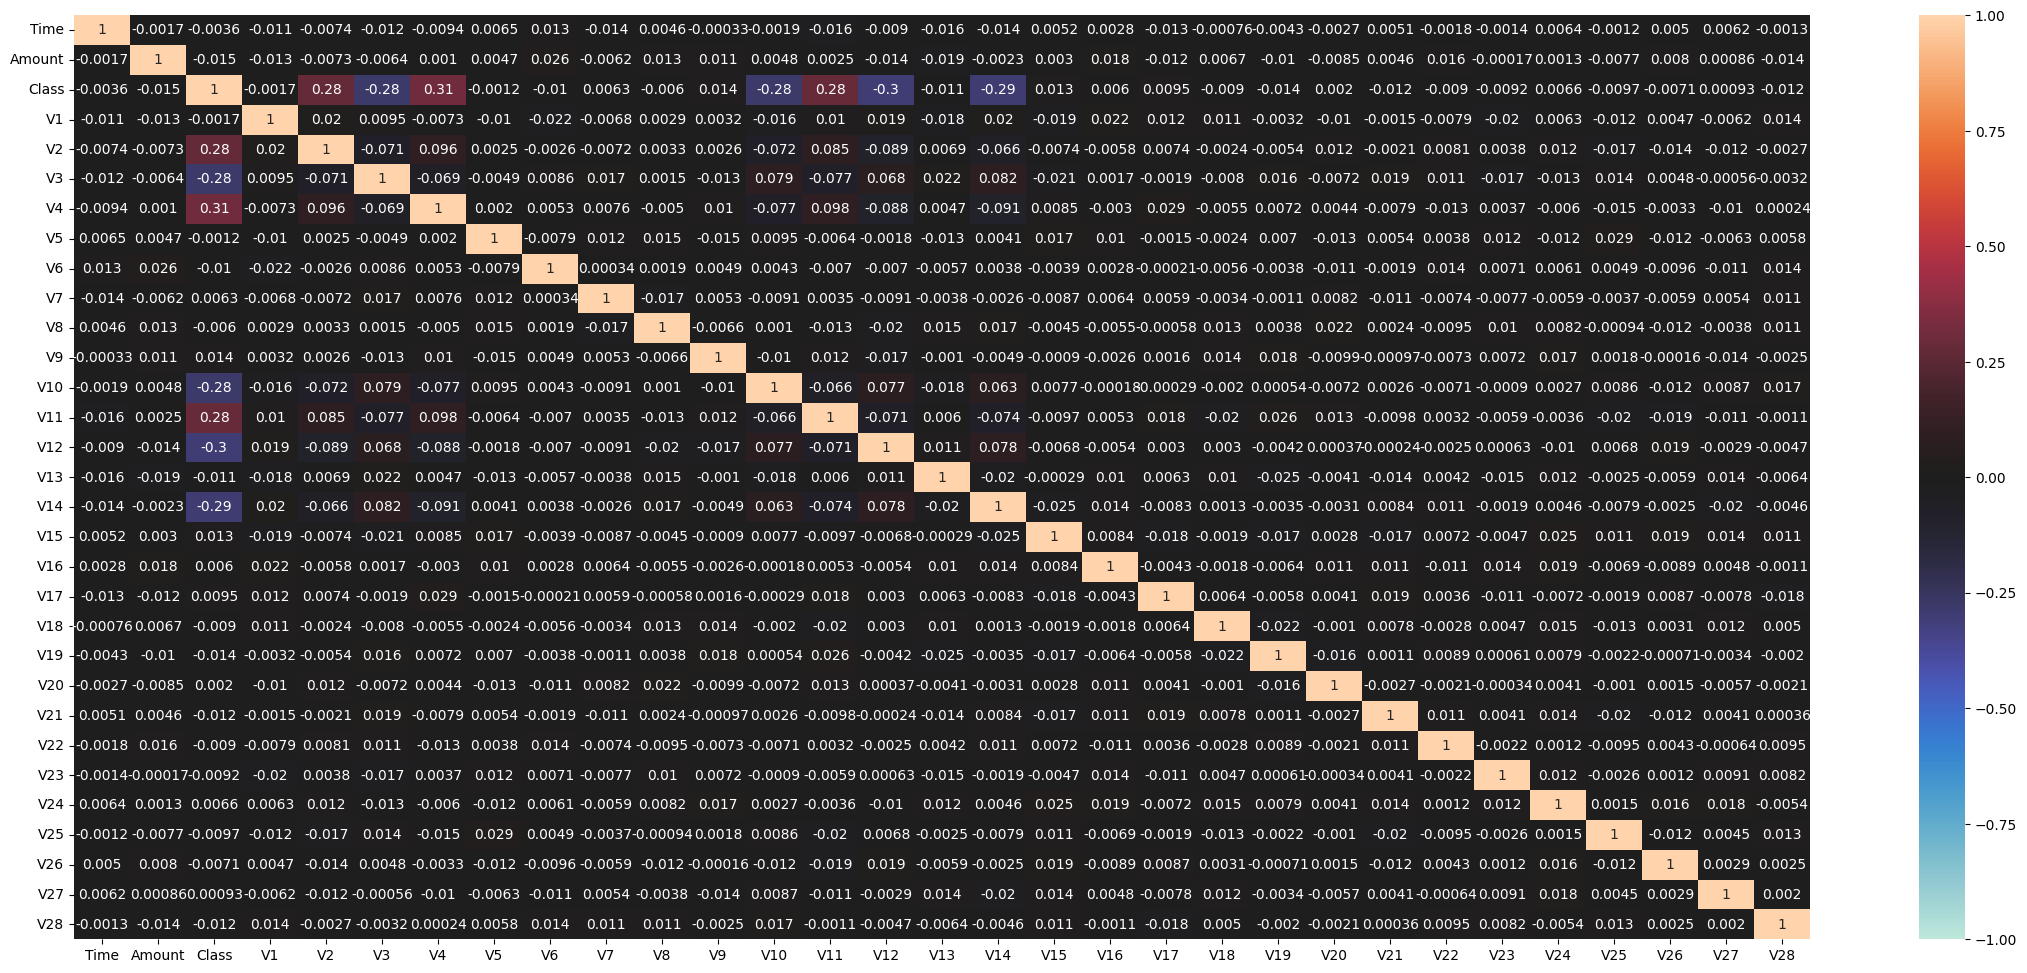

In [245]:
fig, ax = plt.subplots(1, figsize=(28,12))
ax = sns.heatmap(syn_df.corr(), vmin=-1, vmax=1, center=0, annot=True)

The findings of the previous bar graph can be re-confirmed here. Observe the variables that positively correlated strongly to fraudulent transactions, such as V4 and V11. Additionally, there are the variables that negatively correlated to fraudulent classes, such as V12 and V10.

### Training Different Models

In [246]:
# Get X and y into seperate arrays
X = syn_df.iloc[:, :-1].values
y = syn_df.Class.values

In [247]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state=42)

In [248]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

7500 2500 7500 2500


In [249]:
#Feature Scaling
sc = StandardScaler()
X_train, X_test = sc.fit_transform(X_train), sc.transform(X_test)

In [250]:
#Check the summary statistics of the features
X_train_transformed = pd.DataFrame(X_train)
X_train_transformed.describe().T

,count,mean,std,min,25%,50%,75%,max
0,7500.0,-1.573615e-15,1.000067,-1.715769,-0.864276,-0.005248,0.856504,1.763111
1,7500.0,1.756462e-15,1.000067,-1.005011,-0.717066,-0.311265,0.387450,7.074087
2,7500.0,1.108447e-16,1.000067,-0.612691,-0.612691,-0.612691,1.632145,1.632145
3,7500.0,-5.779081e-17,1.000067,-3.850941,-0.677913,0.001064,0.671256,4.451133
4,7500.0,5.873820e-17,1.000067,-3.897610,-0.687581,0.002746,0.676786,3.715962
5,7500.0,4.168517e-16,1.000067,-3.737093,-0.672889,0.006982,0.682268,3.738778
6,7500.0,-2.700062e-16,1.000067,-4.259117,-0.678512,-0.001305,0.675705,3.492219
7,7500.0,1.563194e-17,1.000067,-3.376921,-0.663679,0.010069,0.676798,3.425205
8,7500.0,2.084259e-17,1.000067,-4.146202,-0.686818,0.007942,0.673462,3.403035
9,7500.0,-1.752672e-17,1.000067,-4.458349,-0.680546,-0.002126,0.668446,3.753283


In [251]:
#Quick evaluation function
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    accuracy = accuracy_score(test_labels,predictions)
    print('Model Performance')
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    return accuracy

### KNN Classifier

In [252]:
#Calling the KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [253]:
#Getting the model predictions
y_pred_knn = knn.predict(X_test)

Accuracy is  : 99.0800%
Precision is : 99.6983%
Recall is    : 96.9208%
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1818
           1       1.00      0.97      0.98       682

    accuracy                           0.99      2500
   macro avg       0.99      0.98      0.99      2500
weighted avg       0.99      0.99      0.99      2500



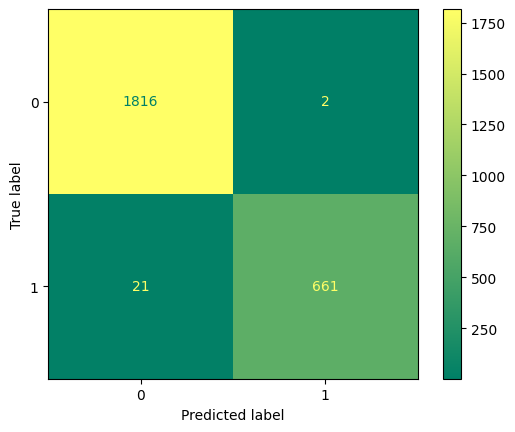

In [254]:
# KNN Classification Results
knn_result = accuracy_score(y_test, y_pred_knn)
print('Accuracy is  : {:.4f}%'.format(knn_result*100))
print('Precision is : {:.4f}%'.format(precision_score(y_test, y_pred_knn)*100))
print('Recall is    : {:.4f}%'.format(recall_score(y_test, y_pred_knn)*100))
print(classification_report(y_test, y_pred_knn))
# print(confusion_matrix(y_test, y_pred_knn, label=[1,0]))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn, cmap='summer')

### Decision Tree Classifier

In [255]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [256]:
# Decision Tree Classifier Predictions
y_pred_dt = dt.predict(X_test)

Accuracy is  : 100.0000%
Precision is : 100.0000%
Recall is    : 100.0000%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1818
           1       1.00      1.00      1.00       682

    accuracy                           1.00      2500
   macro avg       1.00      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500



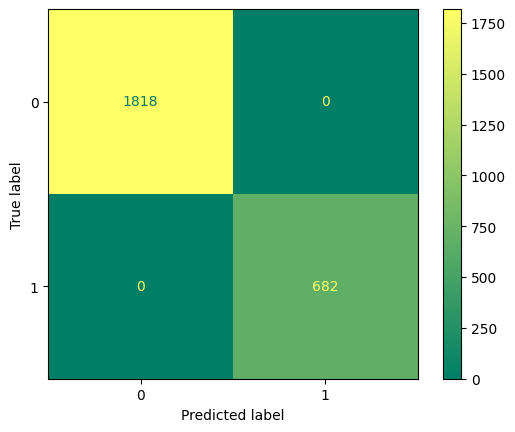

In [257]:
# Decision Tree Classification Results
dt_result = accuracy_score(y_test, y_pred_dt)
print('Accuracy is  : {:.4f}%'.format(dt_result*100))
print('Precision is : {:.4f}%'.format(precision_score(y_test, y_pred_dt)*100))
print('Recall is    : {:.4f}%'.format(recall_score(y_test, y_pred_dt)*100))
print(classification_report(y_test, y_pred_dt))
# print(confusion_matrix(y_test, y_pred_dt, label=[1,0]))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt, cmap='summer')

### Random Forest Classifier

In [258]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [259]:
# Random Forest Classifier Predictions
y_pred_rf = rf.predict(X_test)

Accuracy is  : 100.0000%
Precision is : 100.0000%
Recall is    : 100.0000%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1818
           1       1.00      1.00      1.00       682

    accuracy                           1.00      2500
   macro avg       1.00      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500



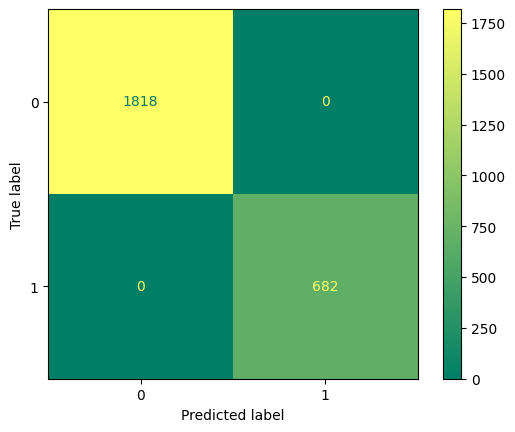

In [260]:
# Random Forest Classification Results
rf_result = accuracy_score(y_test, y_pred_rf)
print('Accuracy is  : {:.4f}%'.format(rf_result*100))
print('Precision is : {:.4f}%'.format(precision_score(y_test, y_pred_rf)*100))
print('Recall is    : {:.4f}%'.format(recall_score(y_test, y_pred_rf)*100))
print(classification_report(y_test, y_pred_rf))
# print(confusion_matrix(y_test, y_pred_rf, label=[1,0]))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, cmap='summer')

### XGBoost Model

In [261]:
import xgboost as xgb
kfold = KFold(n_splits=10)
xgbm = xgb.XGBClassifier(n_estimators=500, random_state=42)

In [262]:
xgbm.fit(X_train, y_train)
y_pred_xgbm = xgbm.predict(X_test)

Accuracy is  : 100.0000%
Precision is : 100.0000%
Recall is    : 100.0000%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1818
           1       1.00      1.00      1.00       682

    accuracy                           1.00      2500
   macro avg       1.00      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500



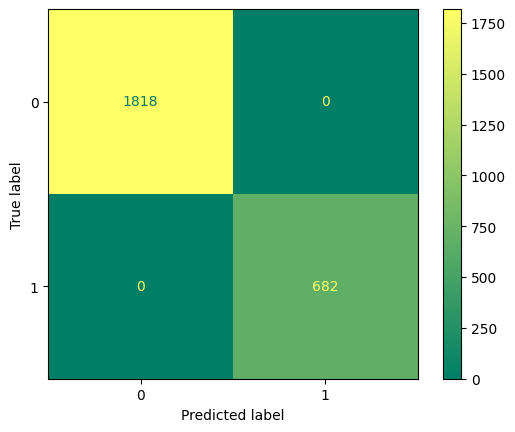

In [263]:
# XGBoost Classification Results
xgbm_result = accuracy_score(y_test, y_pred_xgbm)
print('Accuracy is  : {:.4f}%'.format(xgbm_result*100))
print('Precision is : {:.4f}%'.format(precision_score(y_test, y_pred_xgbm)*100))
print('Recall is    : {:.4f}%'.format(recall_score(y_test, y_pred_xgbm)*100))
print(classification_report(y_test, y_pred_xgbm))
# print(confusion_matrix(y_test, y_pred_xgbm, label=[1,0]))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgbm, cmap='summer')

In [264]:
xgbm_accuracy = evaluate(xgbm, X_test, y_test)

Model Performance
Accuracy = 1.00%.


After using three different classification techniques, it was found that XGBoost with `n_estimators=500` gives the highest overall accuracy (97%, rounded to nearest integer), alongside highest recall, precision and f1 score. Thus we take this model and try out hyperparamter optimisation techniques to see if it can be improved further. We also use cross-validation methods to determine if this model is consistently performing the best across different segmentations of the data.

### Cross Validation Performance of XGBoost

Check if the performance of the XGBoost model is cosnistent across different folds of cross-validation.

In [265]:
xgbm

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, ...)

In [266]:
# XGBoost Model CV Results
cv_results_xgbm = cross_val_score(xgbm, X_train, y_train, cv=kfold, n_jobs=-1)
print(cv_results_xgbm)
print("Accuracy for XGBoost:", cv_results_xgbm.mean())

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Accuracy for XGBoost: 1.0


### Hyperparamter Optimisation using Random Search for XGBoost Model

In [267]:
# Random Search XGBoost Model Paramter Grid
random_grid = {"learning_rate": [0.01, 0.1, 1],
              "max_depth": [1, 2, 3],
              "n_estimators": [250, 500, 600]
              }

In [268]:
xgbmodel = xgb.XGBClassifier()
xgbmodel_random = RandomizedSearchCV(estimator=xgbmodel,
                                     param_distributions=random_grid,
                                     n_iter = 3,
                                     cv=3,
                                     verbose=2,
                                     random_state=42,
                                     n_jobs=-1)

xgbmodel_random.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=3, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 1],
                                        'max_depth': [1, 2, 3],
                                        'n_estimators': [250, 500, 600]},
                   random_state=42, verbose=2)

In [269]:
#Get the best random model from the random search
best_random = xgbmodel_random.best_estimator_
print(best_random)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=600,
              n_jobs=None, num_parallel_tree=None, ...)


In [270]:
#Original XGBoost Model Performance compared to Best Random Performance
print('Original XGBoost Model Accuracy =', evaluate(xgbm, X_test, y_test))
print('Best Random XGBoost Model Accuracy =', evaluate(best_random, X_test, y_test))

Model Performance
Accuracy = 1.00%.
Original XGBoost Model Accuracy = 1.0
Model Performance
Accuracy = 1.00%.
Best Random XGBoost Model Accuracy = 1.0


### Testing with the original dataset


Considering the performance of the best random model was almost the same as the original XGBoost Model, the original model is kept. Hyperparamter optimisation using GridSearch was not possible due to computational limits and the large size of the dataset. This would be a further work to elaborate on.

In [271]:
og_df = pd.read_csv("/content/test_creditcard.csv")

In [272]:
og_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [273]:
#Show imbalanced classes of the original dataset
og_df.Class.value_counts()

,count
Class,
0,284315
1,492


In [274]:
#Get X and y values from the original dataset
X_og = og_df.iloc[:, :-1].values
y_og = og_df.Class.values

In [275]:
X_og

array([[ 0.00000000e+00, -1.35980713e+00, -7.27811733e-02, ...,
         1.33558377e-01, -2.10530535e-02,  1.49620000e+02],
       [ 0.00000000e+00,  1.19185711e+00,  2.66150712e-01, ...,
        -8.98309914e-03,  1.47241692e-02,  2.69000000e+00],
       [ 1.00000000e+00, -1.35835406e+00, -1.34016307e+00, ...,
        -5.53527940e-02, -5.97518406e-02,  3.78660000e+02],
       ...,
       [ 1.72788000e+05,  1.91956501e+00, -3.01253846e-01, ...,
         4.45477214e-03, -2.65608286e-02,  6.78800000e+01],
       [ 1.72788000e+05, -2.40440050e-01,  5.30482513e-01, ...,
         1.08820735e-01,  1.04532821e-01,  1.00000000e+01],
       [ 1.72792000e+05, -5.33412522e-01, -1.89733337e-01, ...,
        -2.41530880e-03,  1.36489143e-02,  2.17000000e+02]])

In [276]:
#Scale the features of X using standard scalar
X_og_sc = sc.fit_transform(X_og)

In [277]:
#Make predictions on the with the dataset using the XGBoost Model
y_og_pred_xgbm = xgbm.predict(X_og_sc)

Accuracy is  : 97.8982%
Precision is : 4.1402%
Recall is    : 50.4065%
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    284315
           1       0.04      0.50      0.08       492

    accuracy                           0.98    284807
   macro avg       0.52      0.74      0.53    284807
weighted avg       1.00      0.98      0.99    284807



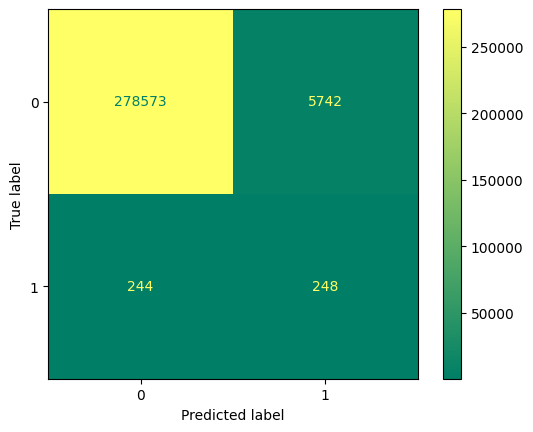

In [278]:
#Get the classification metrics for the predictions made on the original dataset
xgbm_result_og = accuracy_score(y_og, y_og_pred_xgbm)
print('Accuracy is  : {:.4f}%'.format(xgbm_result_og*100))
print('Precision is : {:.4f}%'.format(precision_score(y_og, y_og_pred_xgbm)*100))
print('Recall is    : {:.4f}%'.format(recall_score(y_og, y_og_pred_xgbm)*100))
print(classification_report(y_og, y_og_pred_xgbm))
# print(confusion_matrix(y_og, y_og_pred_xgbm, label=[1,0]))
ConfusionMatrixDisplay.from_predictions(y_og, y_og_pred_xgbm, cmap='summer')

In [279]:
from sklearn.metrics import average_precision_score
y_og_pred_probs = xgbm.predict_proba(X_og_sc)
auprc = average_precision_score(y_og, y_og_pred_probs[:,1])
print('AUPRC =', auprc)

#It is better to use AUPRC instead of confusion matrix/accuracy for a highly imbalanced dataset that has very little positive-class data. It does not consider anything in the true negative
#classes and thus focuses on the positive class of the dataset only.

AUPRC = 0.021726191314212377


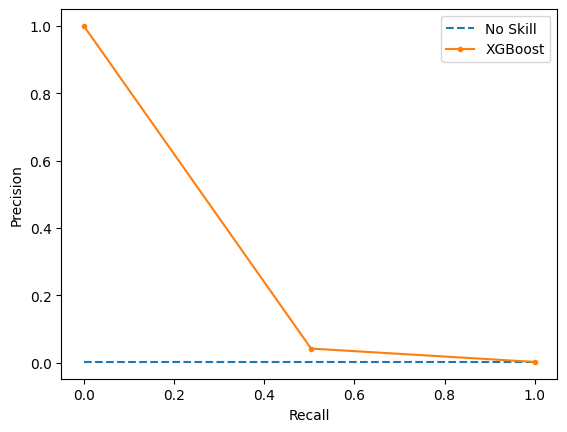

In [280]:
# calculate the no skill line as the proportion of the positive class
no_skill = len(y_og[y_og==1]) / len(y_og)
# plot the no skill precision-recall curve
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
# calculate model precision-recall curve
precision, recall, _ = precision_recall_curve(y_og, y_og_pred_probs[:,1])
# plot the model precision-recall curve
plt.plot(recall, precision, marker='.', label='XGBoost')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

#This shows a more realistic overview of the model, which has poor precision.

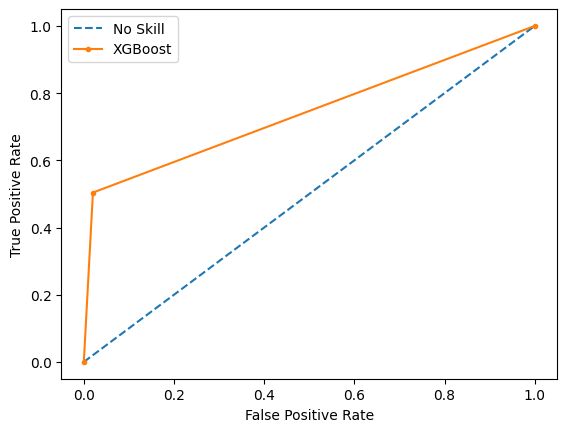

In [281]:
from sklearn.metrics import roc_curve
pos_probs = y_og_pred_probs[:,1]
# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(y_og, pos_probs)
# plot model roc curve
plt.plot(fpr, tpr, marker='.', label='XGBoost')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

#The ROC curve is misleading, as the dataset is highly imbalanced. This is to demonstrate why PR-AUC is used instead of ROC.